C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_39500\2924114396.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 

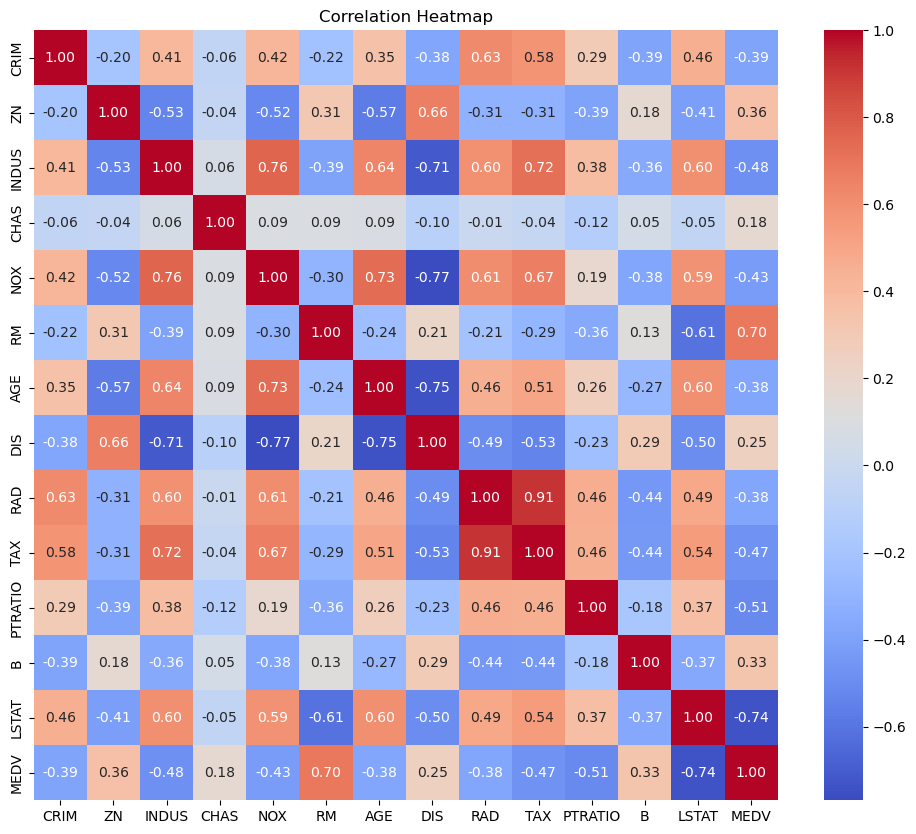

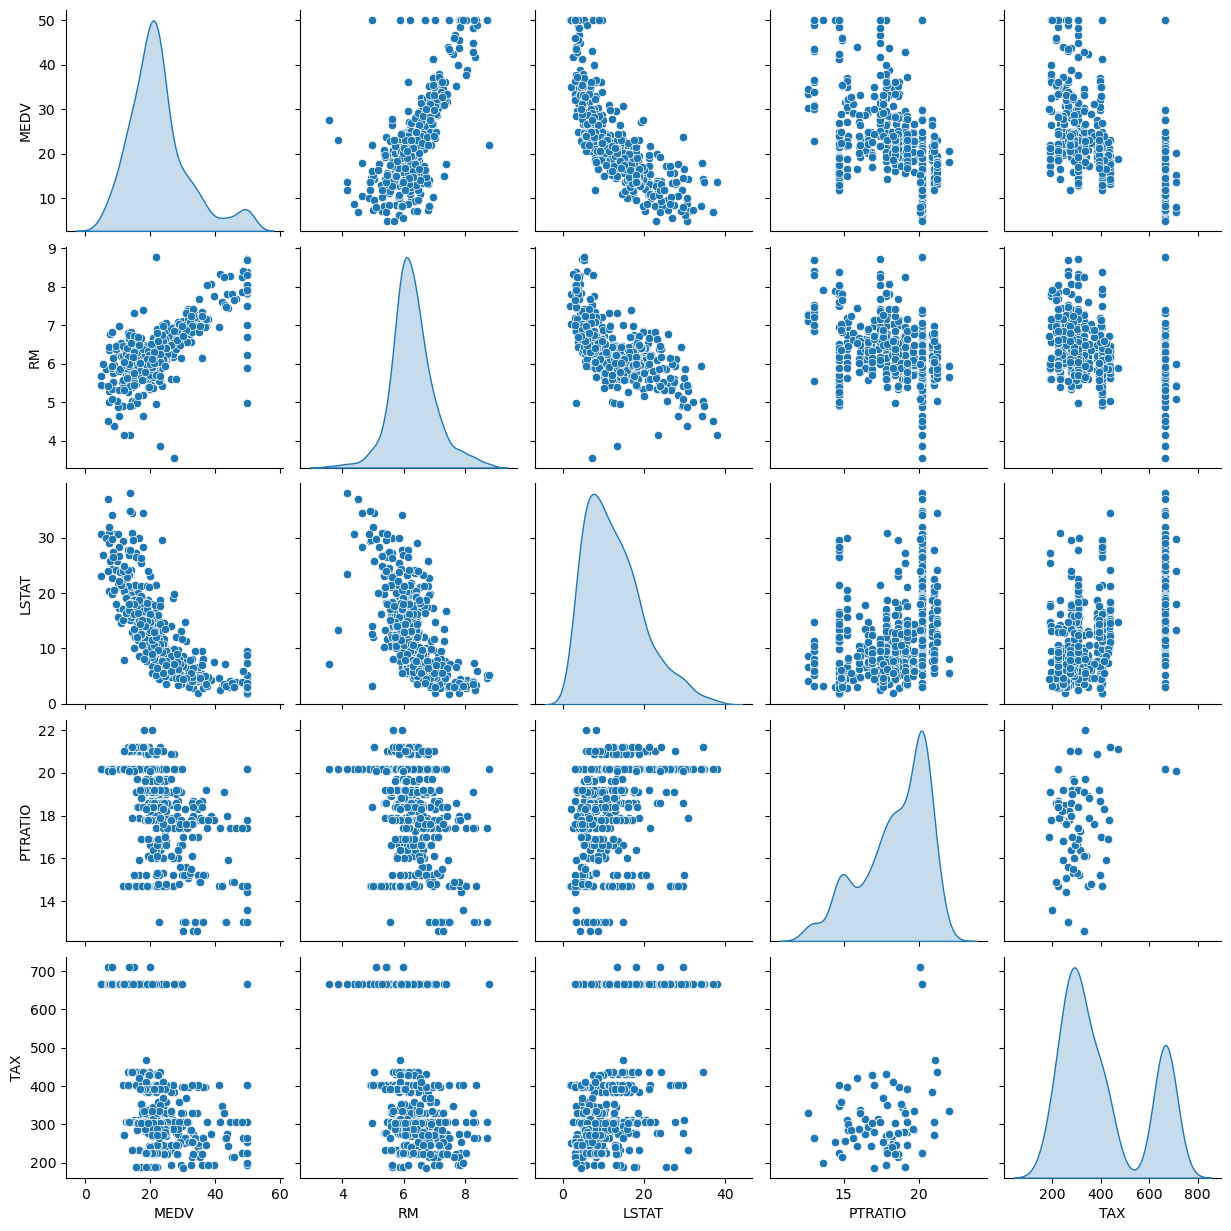

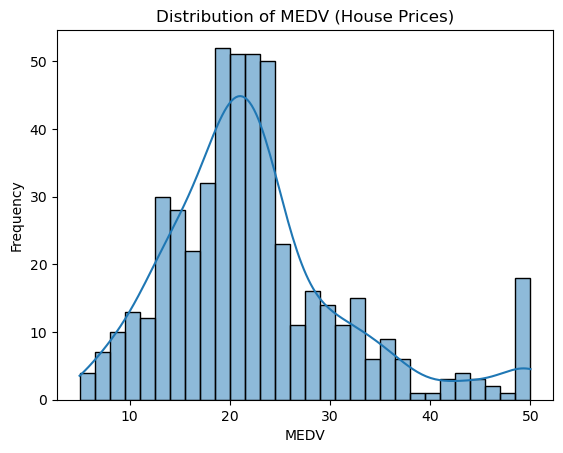


Model Evaluation:
Training RMSE: 4.65
Testing RMSE: 4.93
R^2 Score on Training Set: 0.75
R^2 Score on Testing Set: 0.67

Model Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4       NOX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571

Intercept: 30.246750993923598


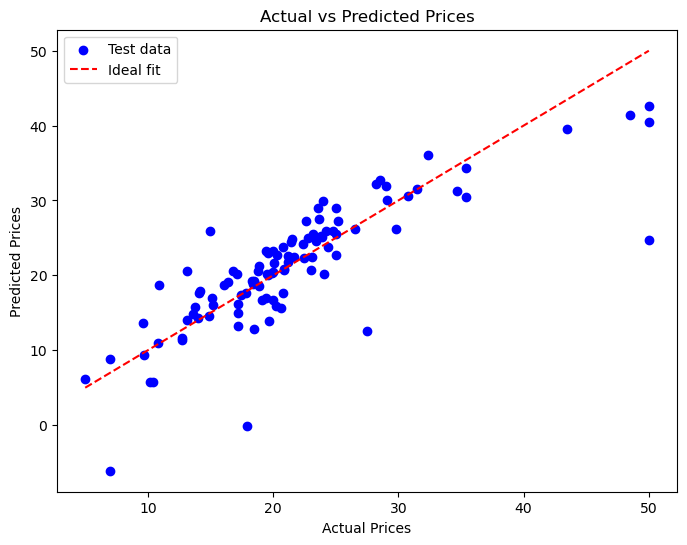

In [11]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Data description and info
print("\nDataset Info:")
print(data.info())

print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected features
sns.pairplot(data[["MEDV", "RM", "LSTAT", "PTRATIO", "TAX"]], diag_kind="kde")
plt.show()

# Visualizing target variable
sns.histplot(data["MEDV"], kde=True, bins=30)
plt.title("Distribution of MEDV (House Prices)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

# Splitting data into features and target
X = data.drop("MEDV", axis=1)  # Features
y = data["MEDV"]  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation
print("\nModel Evaluation:")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"R^2 Score on Training Set: {r2_score(y_train, y_pred_train):.2f}")
print(f"R^2 Score on Testing Set: {r2_score(y_test, y_pred_test):.2f}")

# Coefficients and intercept
print("\nModel Coefficients:")
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

print(f"\nIntercept: {model.intercept_}")

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c="blue", marker="o", label="Test data")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()
